Python code please. Please import the following 10 csv files. The files are named T1.csv to T10. column 1 is date, column 2 is time (each hour) and colum 3 is temperature, ignore other columns. First row is the header. Use the following headers in the CSV file that correspond to imported CSV files:

T1: 'ambient',
T2: 'soilcold',
T3: 'c2l',
T4: 'c2g', 
T5: 'c2t',
T6: 'c2s', 
T7: 'c3l', 
T8: 'c3g', 
T9: 'cst', 
T10: 'c3s'

Define fixed timerange for all sets given user input of time (no minutes or seconds) in the code. Generate a single csv file with column1 temp range and other 10 colums T1-T10. Keep code short and simple. No fancy stuff. keep simple.Use stat_time and end_time as input names. temperature range will be in hour increments, according to second column in orginal files (T1-T10)

In [17]:
start_time = '2025-07-29 00:00'
end_time = '2025-08-07 09:00'

In [18]:

import pandas as pd



# Create hourly time index for the entire range
hourly_index = pd.date_range(start=start_time, end=end_time, freq='H')
master_df = pd.DataFrame(index=hourly_index)

# File mapping with column names
file_mapping = {
    'T1': 'ambient',
    'T2': 'soilcold',
    'T3': 'c2l',
    'T4': 'c2g',
    'T5': 'c2t',
    'T6': 'c2s',
    'T7': 'c3l',
    'T8': 'c3g',
    'T9': 'cst',
    'T10': 'c3s'
}

# Process each file
for prefix, col_name in file_mapping.items():
    df = pd.read_csv(f'{prefix}.csv', usecols=[0, 1, 2])
    
    # Create datetime from date and time columns
    datetime_str = df.iloc[:, 0] + ' ' + df.iloc[:, 1]
    df['datetime'] = pd.to_datetime(datetime_str)
    
    # Set index and filter to time range
    temp_df = df.set_index('datetime').iloc[:, 2].loc[start_time:end_time]
    
    # Add to master dataframe
    master_df[col_name] = temp_df

# Save to CSV
master_df.to_csv('combined_temperatures.csv')
print("Combined file saved with hourly temperature data")

Combined file saved with hourly temperature data


Given this 'combined_temperatures.csv' file generate a plot where the used specifies which of the 10 headings from the combined file he want to plot. Then generate a professional plot where the chosen temperatures are plotted agains the timeline.

Available temperature columns:
ambient, soilcold, c2l, c2g, c2t, c2s, c3l, c3g, cst, c3s
Enter column names to plot (comma-separated): c2l,c3l
Plot saved as 'temperature_plot_20250807_143558.png'


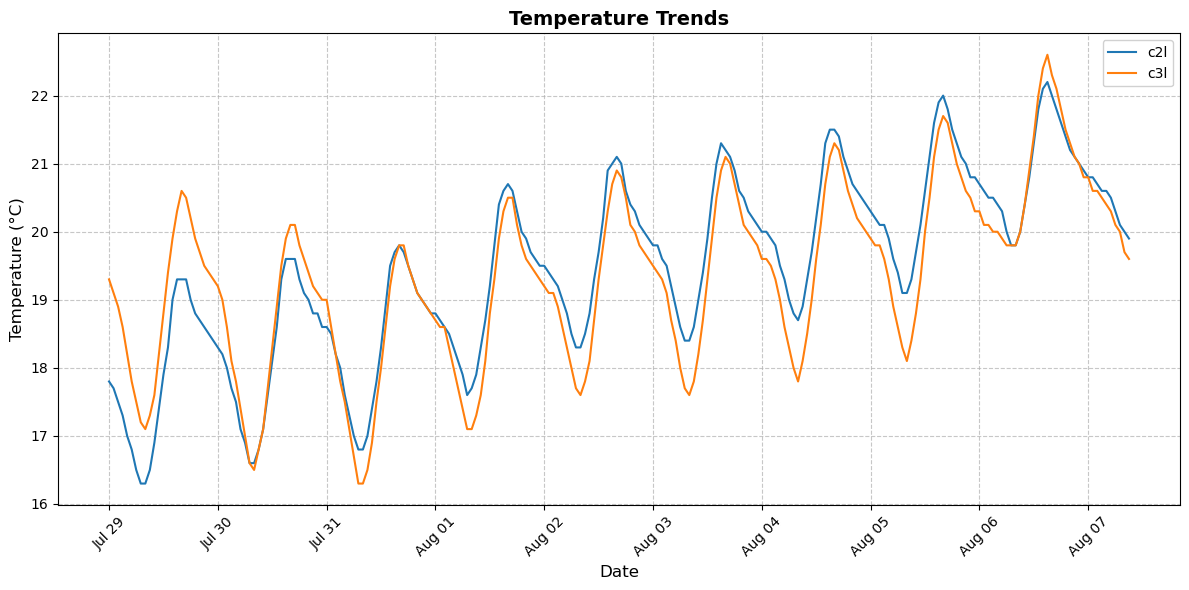

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Load the combined temperature data
df = pd.read_csv('combined_temperatures.csv', parse_dates=[0], index_col=0)

# Display available columns for selection
print("Available temperature columns:")
print(", ".join(df.columns))

# Get user input for columns to plot
selected = input("Enter column names to plot (comma-separated): ").strip().split(',')
selected = [col.strip() for col in selected if col.strip() in df.columns]

if not selected:
    print("No valid columns selected. Exiting.")
    exit()

# Create professional plot
plt.figure(figsize=(12, 6))
ax = plt.gca()

# Plot each selected temperature series
for col in selected:
    ax.plot(df.index, df[col], label=col, linewidth=1.5)

# Format plot elements
plt.title('Temperature Trends', fontsize=14, fontweight='bold')
plt.ylabel('Temperature (°C)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(frameon=True, facecolor='white', framealpha=0.9)

# Format date axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
plt.xticks(rotation=45)
plt.tight_layout()

# Save and show plot
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
plt.savefig(f'temperature_plot_{timestamp}.png', dpi=300)
print(f"Plot saved as 'temperature_plot_{timestamp}.png'")
plt.show()